### DecisionTrees models. This example covers a DecisionTreeRegressor and a DecisionTreeClassifier using a cleaned up and smaller Titanic data set

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split,check_cv,GridSearchCV
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,plot_roc_curve,plot_precision_recall_curve

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
#This data has been cleaned up considerably for the purpose of this example
df = pd.read_csv('./data/titanic_clean.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
 10  Embarked_s   712 non-null    int64  
 11  Embarked_q   712 non-null    int64  
 12  Embarked_c   712 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 72.4+ KB


In [21]:
#Map values to 0 or 1 for Sex and Embarked column

df['Sex'] = df['Sex'].map({'male':0,'female':1})

df['Embarked_s'] = df['Embarked'].map({ 'S':1,'Q':0,'C':0})
df['Embarked_q'] = df['Embarked'].map({ 'S':0,'Q':1,'C':0})
df['Embarked_c'] = df['Embarked'].map({ 'S':0,'Q':0,'C':1})

In [25]:
#Drop columns that aren't needed for model building
df.drop(columns=['PassengerId','Name','Embarked'],inplace=True)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_q,Embarked_c
0,0,3,0,22.0,1,0,7.2500,1,0,0
1,1,1,1,38.0,1,0,71.2833,0,0,1
2,1,3,1,26.0,0,0,7.9250,1,0,0
3,1,1,1,35.0,1,0,53.1000,1,0,0
4,0,3,0,35.0,0,0,8.0500,1,0,0


In [31]:
#split data frame into feautres and dependent variable
X = df.copy()
X.drop(columns=['Survived'],inplace=True)
y = df['Survived']
X.head()
y

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_q,Embarked_c
0,3,0,22.0,1,0,7.2500,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,1
2,3,1,26.0,0,0,7.9250,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0
4,3,0,35.0,0,0,8.0500,1,0,0


0      0
1      1
2      1
3      1
4      0
      ..
707    0
708    0
709    1
710    1
711    0
Name: Survived, Length: 712, dtype: int64

In [32]:
#split X into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Use a DecisionTree Classifier to predict if a passenger survided or not.
### GridSearch over hyperparamters for a optimal model


In [126]:
dtclf = DecisionTreeClassifier()
param_gridclf = {'criterion':['gini','entropy'],
           'splitter':['random','best'],
          'max_depth' :[5,7,13],
          'min_samples_split' :[2,5],
         }

clfgrid = GridSearchCV(dtclf,param_grid=paramgridclf,cv=5,verbose = 1)

In [127]:
clfgrid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 13], 'min_samples_split': [2, 5],
                         'splitter': ['random', 'best']},
             verbose=1)

In [128]:
clfgrid.best_estimator_
clfgrid.best_params_

DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='random')

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_split': 2,
 'splitter': 'random'}

In [129]:
y_preds = clfgrid.predict(X_test)

### Accuracy score of classifier on train and test data

In [130]:
clfgrid.score(X_train,y_train)
clfgrid.score(X_test,y_test)

0.8393574297188755

0.794392523364486

### Plot confusion matrix (TP,FP,FN,TN)

In [155]:
tn, fp, fn, tp = confusion_matrix(y_test,
                                  y_preds).ravel()
print(confusion_matrix(y_test,
                       y_preds))

[[116   6]
 [ 38  54]]


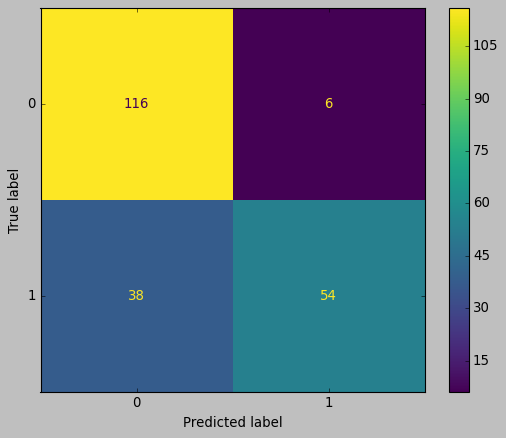

In [148]:
plt.style.use('classic')
cmatrix = confusion_matrix(y_test,y_preds)
plot_confusion_matrix(clfgrid,X_test,y_test);

In [188]:
plt.rcdefaults()

### Plot Area Under Curve(AUC).Higher AUC value means that accuracy score of the model is good

<Figure size 1500x800 with 0 Axes>

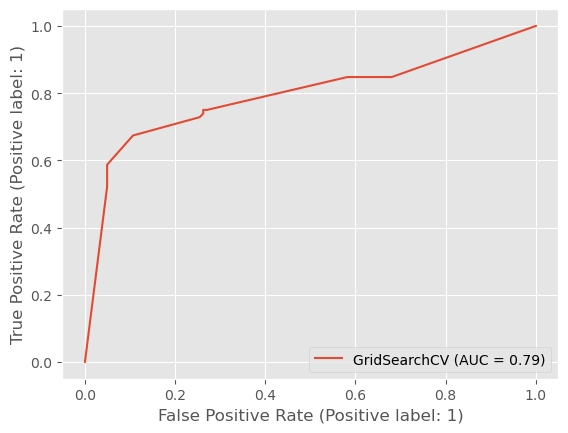

In [153]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plot_roc_curve(clfgrid,X_test,y_test,);

### Decision tree graph as used by the classifier.

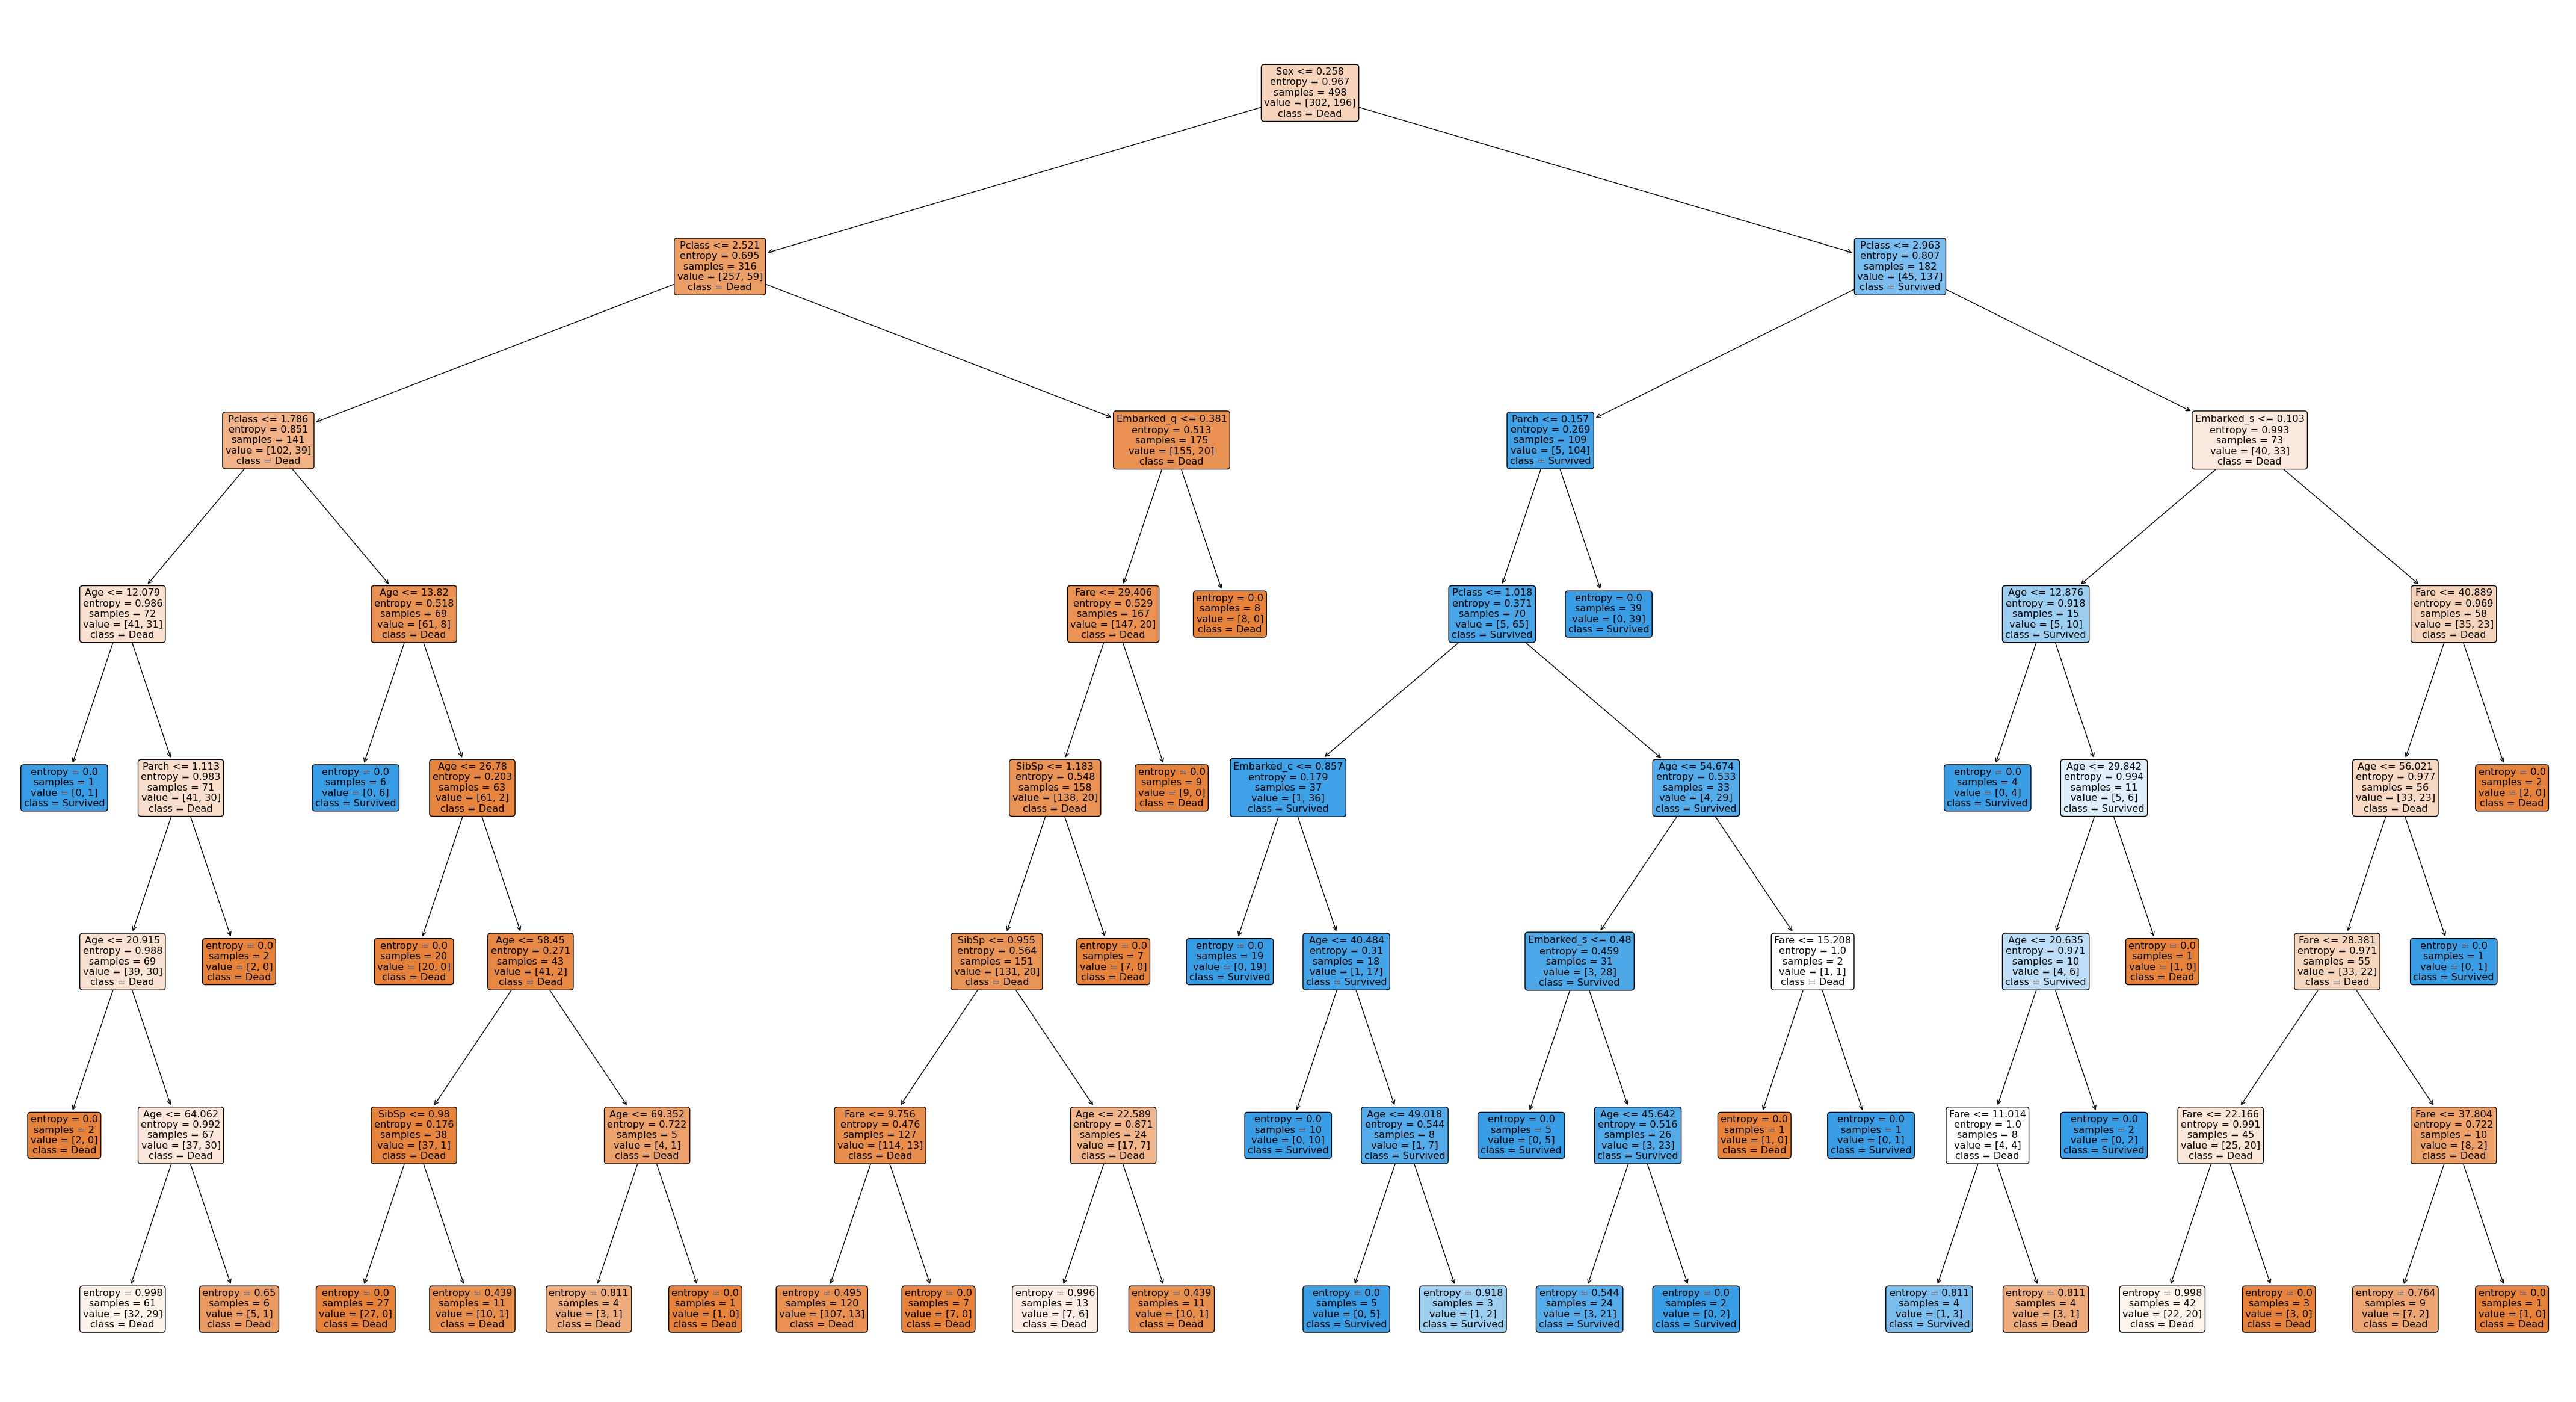

In [196]:
from sklearn.tree import plot_tree

plt.rcdefaults()
plt.figure(figsize = (55,30))

# Plot our tree.
plot_tree(clfgrid.best_estimator_,
          feature_names = X_train.columns,
          class_names = ['Dead', 'Survived'],
          rounded=True,
          filled = True);

### Use a DecisionTree Classifier to predict if a passenger survided or not.
### GridSearch over hyperparamters for a optimal model


In [193]:
### Pairplot relationship between all features and survived. 
### Using correlation matrix and pair scatter plots there isn't strong linearity in between survived and rest of the features.
### Likely DecisionTreeRegressor is going to perform poorly on this dataset

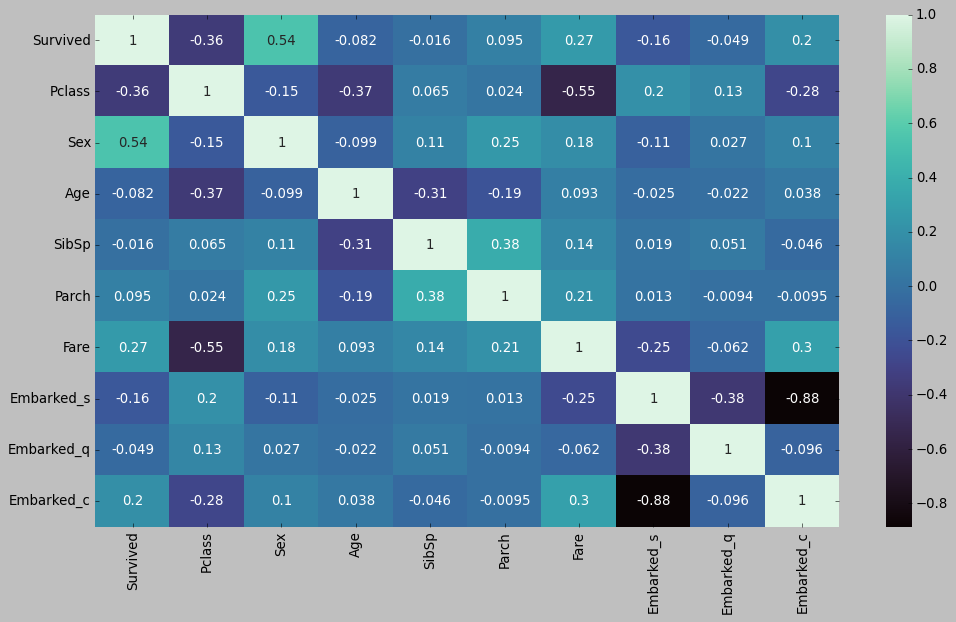

In [190]:
plt.rcdefaults()
plt.style.use('classic')
plt.figure(figsize= (15,8))
sns.heatmap(df.corr(),vmax=1,annot = True,cmap='mako');
plt.show();

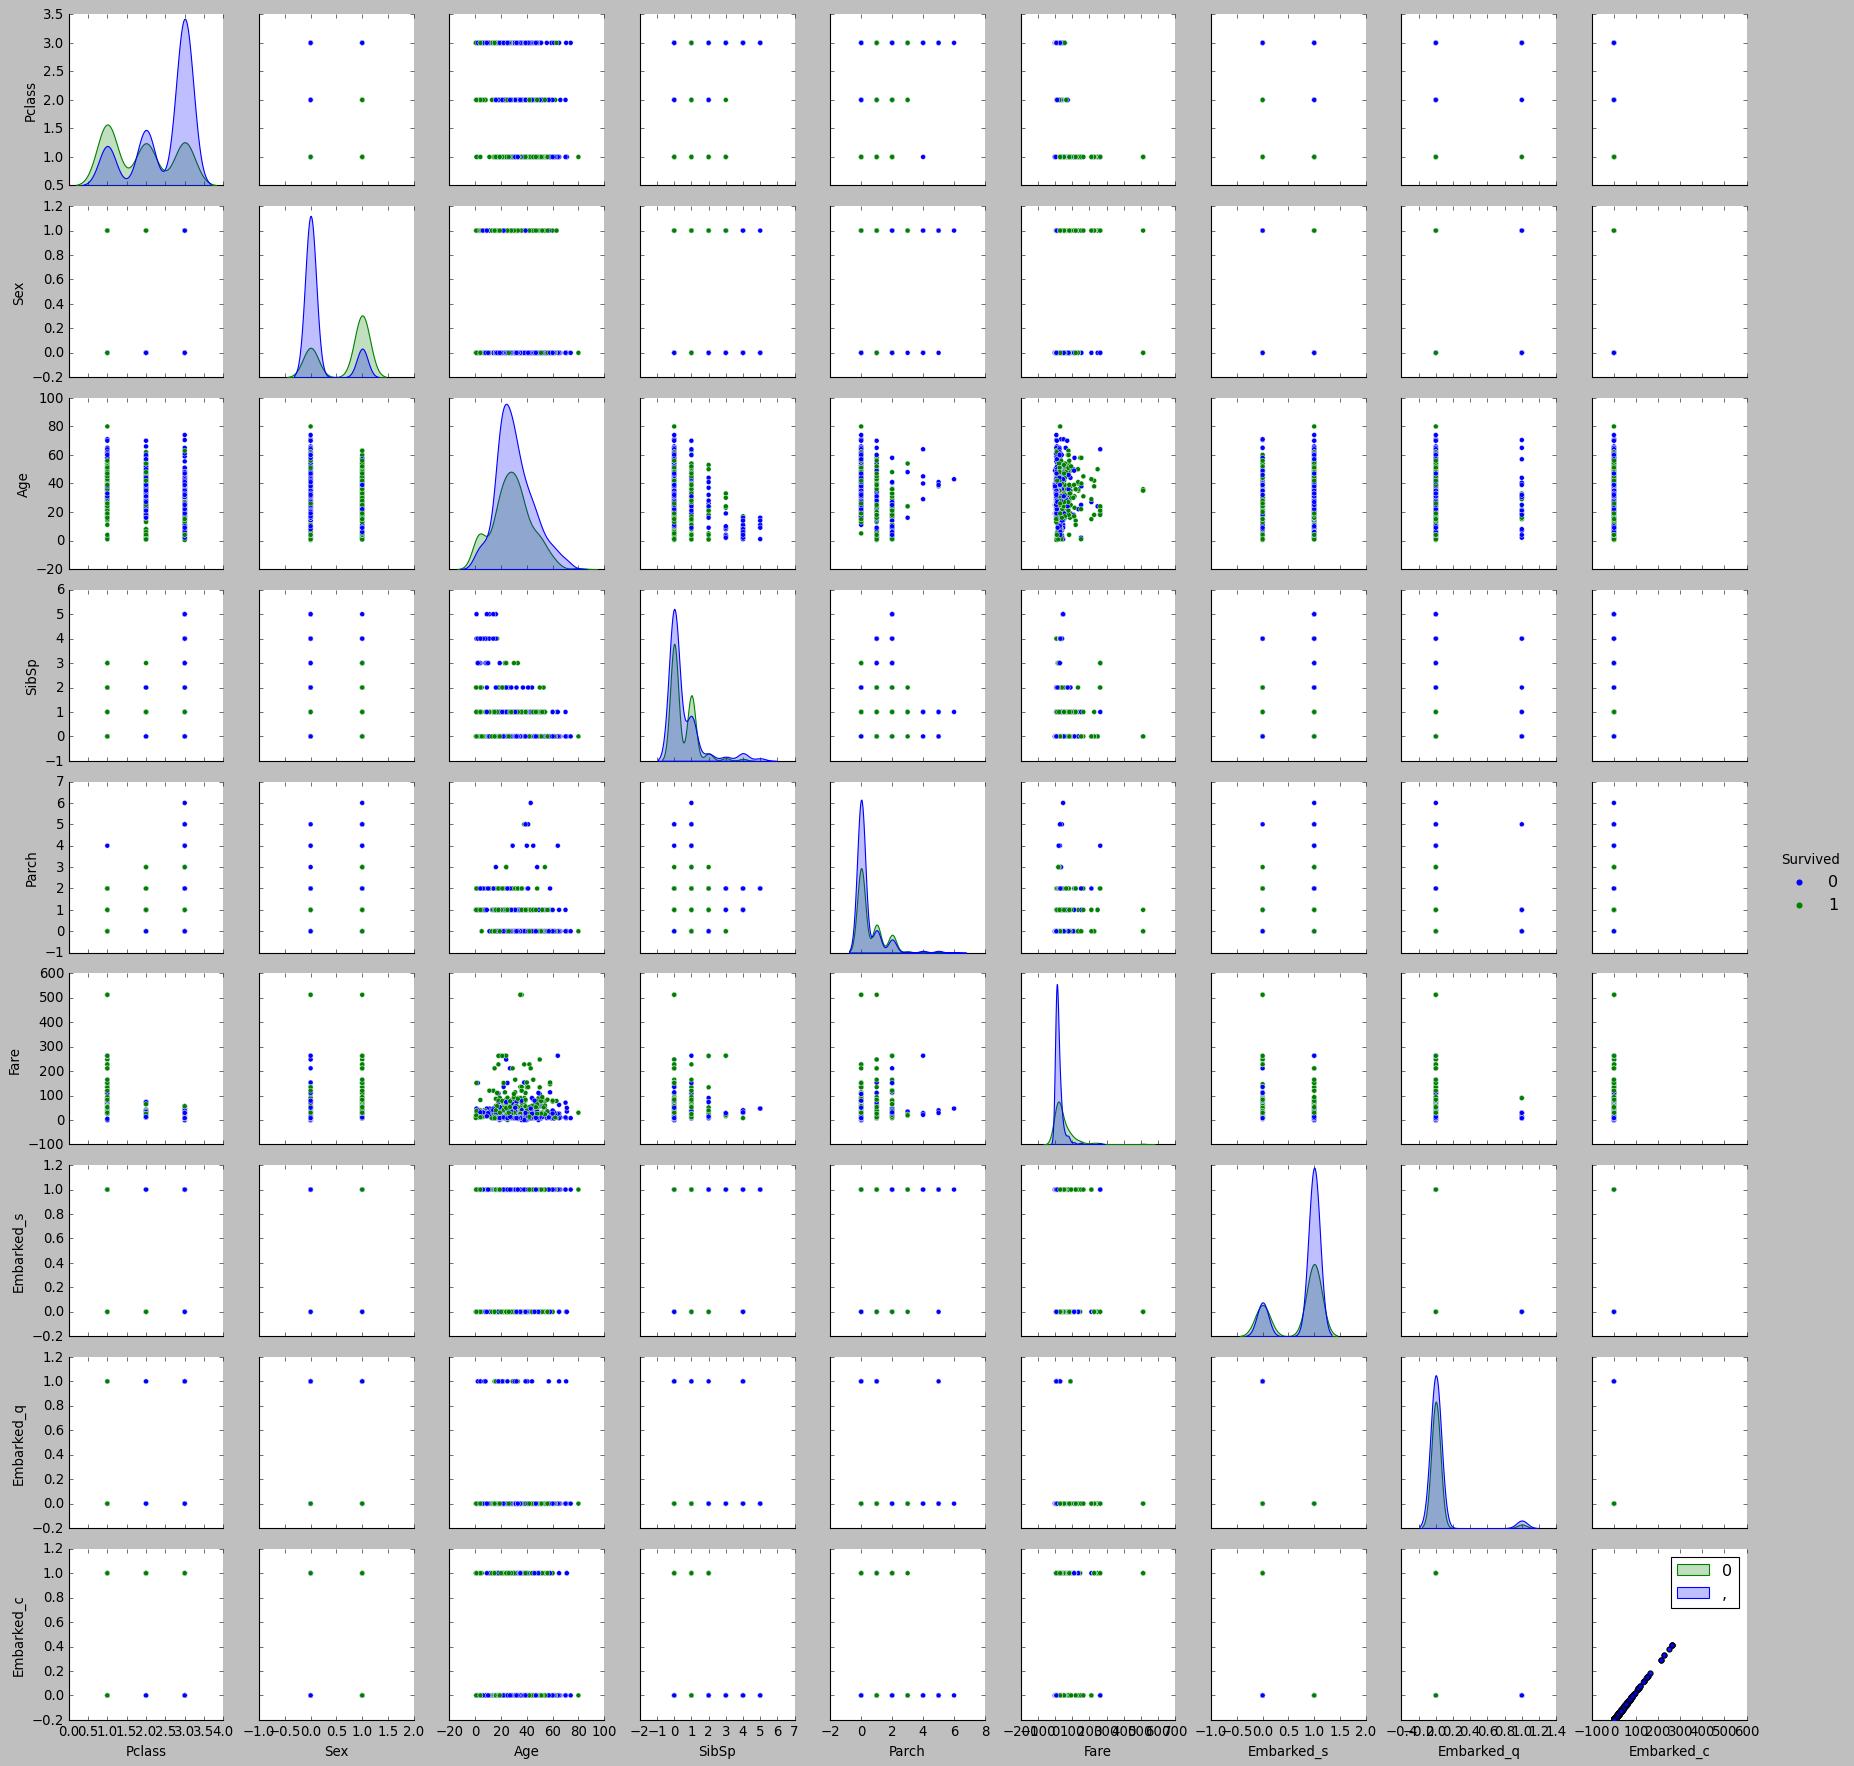

In [192]:
import seaborn as sns
sns.pairplot(df, hue = 'Survived');
plt.legend('0,1')
plt.scatter(df,df,alpha = 0.7)
plt.show();

dtrgrs = DecisionTreeRegressor()
param_gridrgrs = {'criterion':['mse','mae','friedman_mse'],
            'splitter':['random','best'],
          'max_depth' :[5,7,13,21],
          'min_samples_split' :[2,5],
         }

rgrsgrid = GridSearchCV(dtrgrs,param_grid=param_gridrgrs,cv=5,verbose = 1)

In [139]:
rgrsgrid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': [5, 7, 13, 21],
                         'min_samples_split': [2, 5],
                         'splitter': ['random', 'best']},
             verbose=1)

In [140]:
ypreds_rgrs = rgrsgrid.predict(X_test)

In [141]:
rgrsgrid.best_estimator_
rgrsgrid.best_params_

DecisionTreeRegressor(max_depth=5, min_samples_split=5, splitter='random')

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_split': 5,
 'splitter': 'random'}

### As suspected regressor estimator is doing a poor job at predicting if a passenger survived or not

In [ ]:
### R2 score of the regressor estimator

In [142]:
rgrsgrid.score(X_train,y_train)
rgrsgrid.score(X_test,y_test)

0.53062681262035

0.33856483719865704

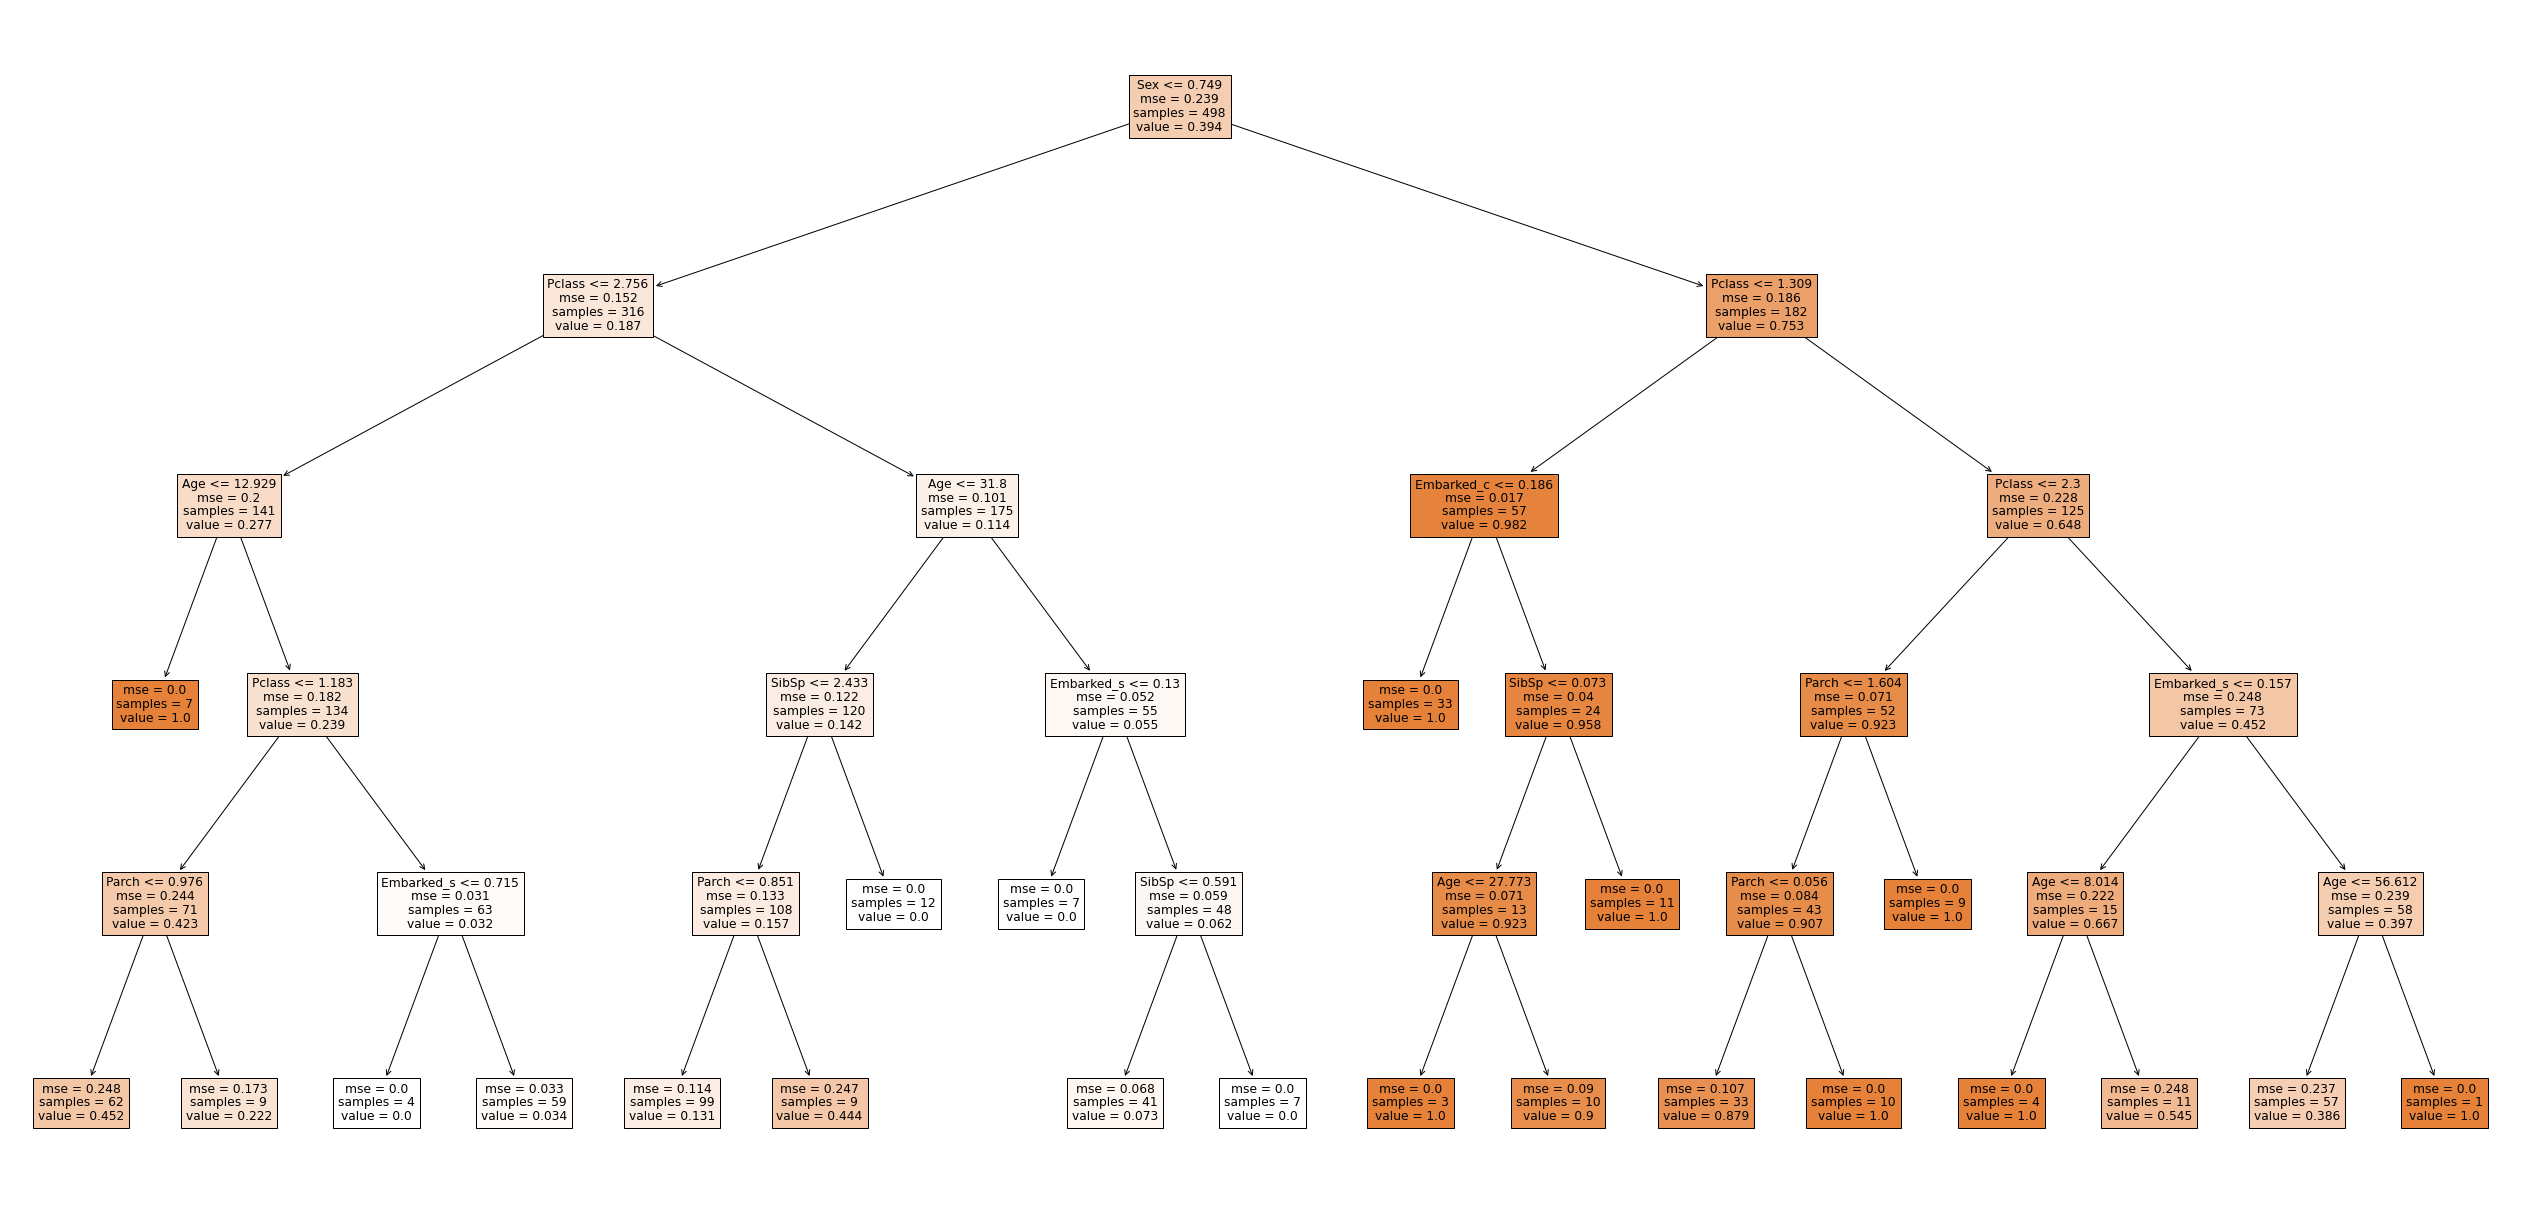

In [145]:
plt.figure(figsize = (45,22))

# Plot our tree.
plot_tree(rgrsgrid.best_estimator_,
          feature_names = X_train.columns,
          class_names = ['Dead', 'Survived'],
          filled = True);